In [1]:
import os
import sys
sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/mmFromTifs2"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/mmFromTifs2/Fish6_Untreated.mm', '/media/cjw/Data/cyto/mmFromTifs2/Fish6_ICE.mm', '/media/cjw/Data/cyto/mmFromTifs2/Fish6_CCB.mm']
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
30000


dict_keys(['Fish6_Untreated.mm', 'Fish6_ICE.mm', 'Fish6_CCB.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000


Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 3) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 16, 16, 64) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 4, 4, 256) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 192), dtype=float32)
isize:  4 32
dh0 (?, 32, 32, 3)
[<tf.Tensor 'dropout_3/mul:0' shape=(?, 4096) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 256) dtype=float32>, <tf.Tensor 'dropout_4/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 16, 16, 64) dtype=float32>] Tensor("Minimum:0", shape=(?, 32, 32, 3), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32) Tensor("Mean_2:0", shape=(), dtype=float32) Tensor("add_5:0", shape=(), dtype=float32)
30000 234 128
Epoch:  0 Iteration:  0 Loss:  221.901 1.3655 0.147598


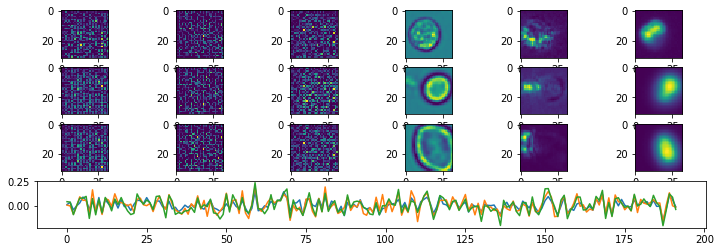

Epoch:  1 Iteration:  0 Loss:  22.7004 0.325711 0.0105089


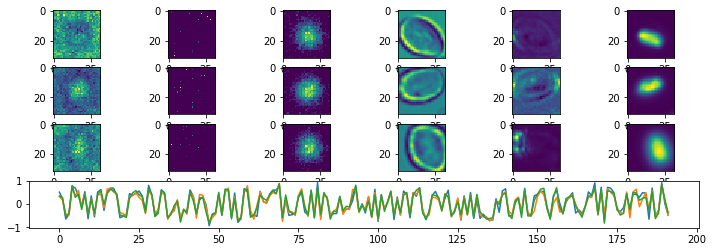

Epoch:  2 Iteration:  0 Loss:  16.166 0.31638 0.0162064


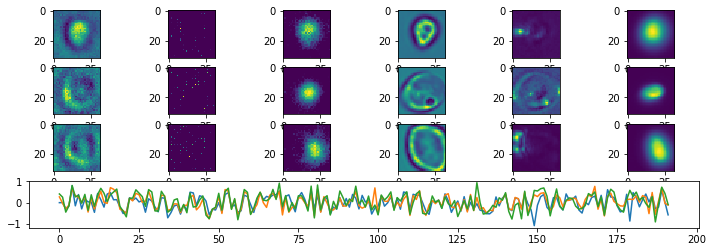

Epoch:  3 Iteration:  0 Loss:  12.7446 0.31103 0.0144451


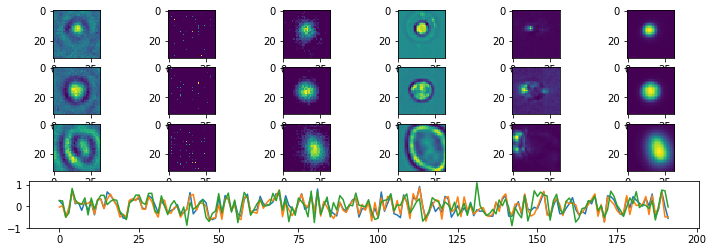

Epoch:  4 Iteration:  0 Loss:  10.3917 0.307883 0.0155661


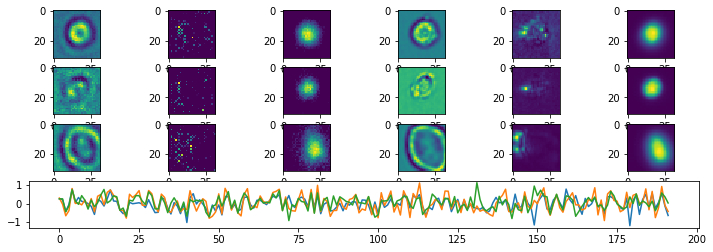

Epoch:  5 Iteration:  0 Loss:  9.03237 0.304424 0.014498


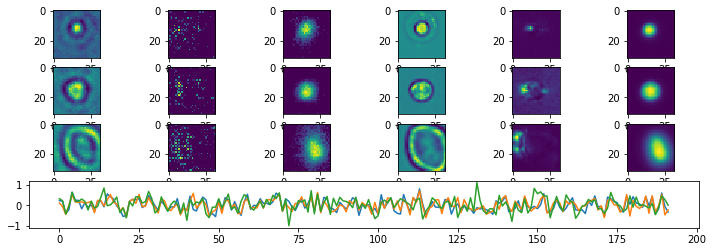

Epoch:  6 Iteration:  0 Loss:  8.28577 0.300079 0.012749


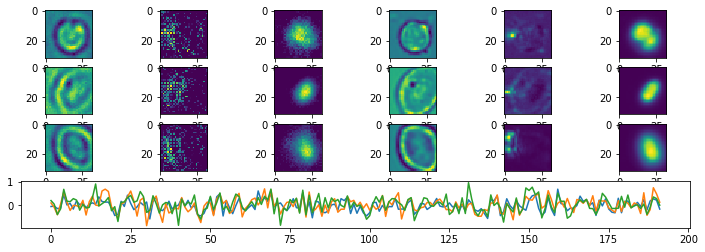

Epoch:  7 Iteration:  0 Loss:  7.73399 0.295881 0.0112604


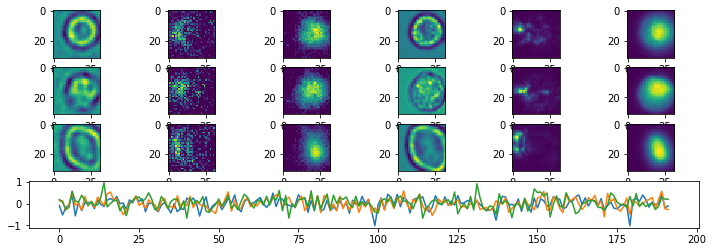

Epoch:  8 Iteration:  0 Loss:  7.15797 0.292461 0.0088436


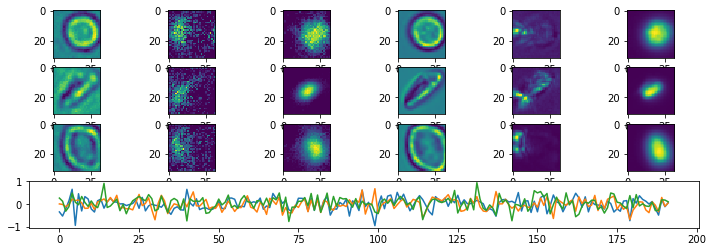

Epoch:  9 Iteration:  0 Loss:  6.40375 0.289908 0.00772423


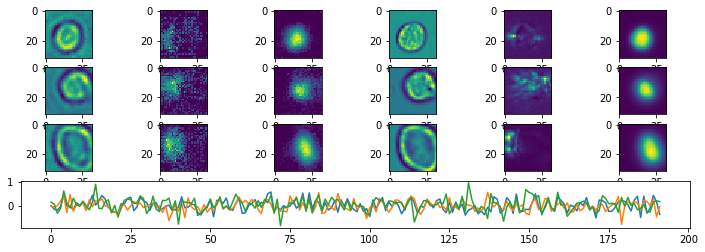

Epoch:  10 Iteration:  0 Loss:  5.99304 0.287541 0.00627629


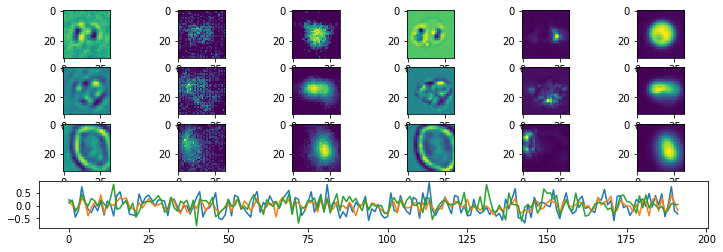

Epoch:  11 Iteration:  0 Loss:  5.64509 0.284994 0.00304818


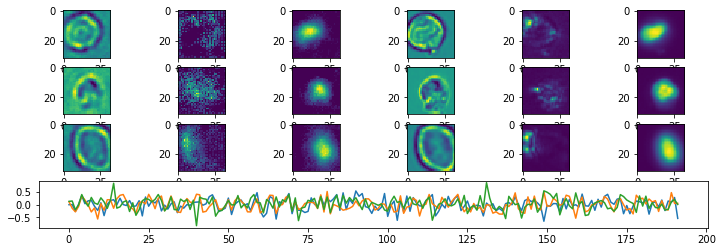

Epoch:  12 Iteration:  0 Loss:  5.55398 0.284311 0.00418843


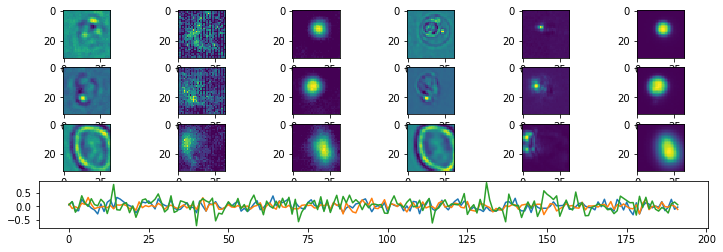

Epoch:  13 Iteration:  0 Loss:  5.08753 0.282834 0.00388558


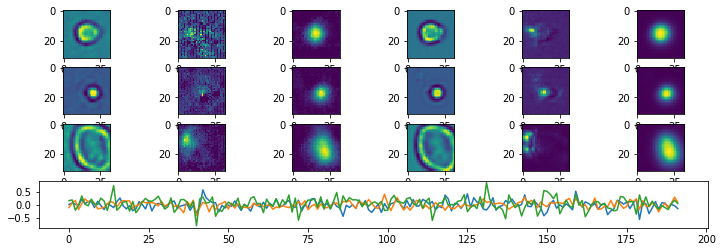

Epoch:  14 Iteration:  0 Loss:  4.79939 0.281549 0.0033951


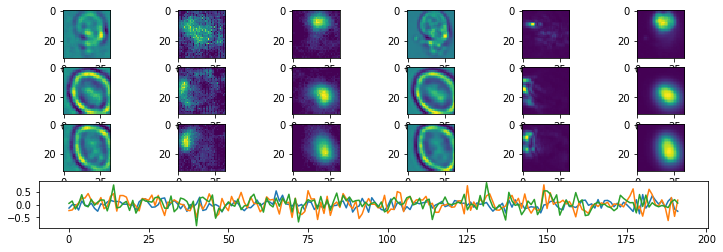

Epoch:  15 Iteration:  0 Loss:  4.64665 0.280153 0.00202347


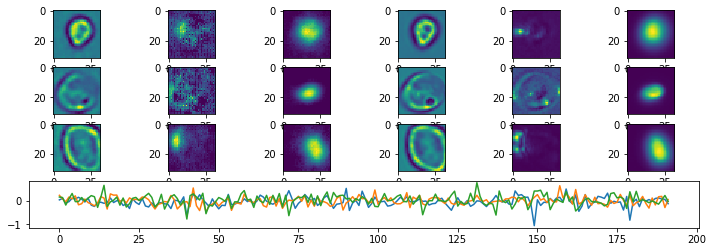

Epoch:  16 Iteration:  0 Loss:  4.42285 0.278903 0.000791445


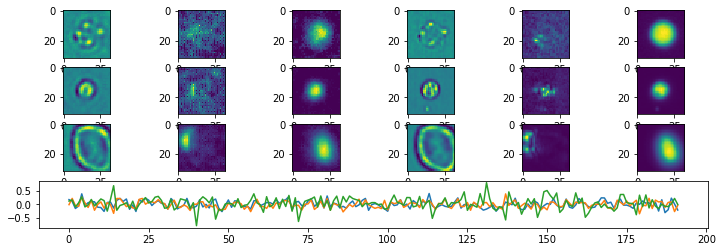

Epoch:  17 Iteration:  0 Loss:  4.19997 0.278126 0.000905246


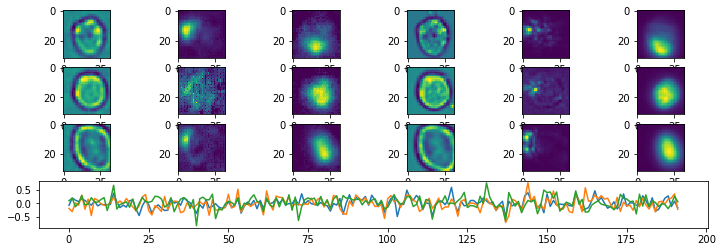

Epoch:  18 Iteration:  0 Loss:  4.08934 0.278125 0.0020414


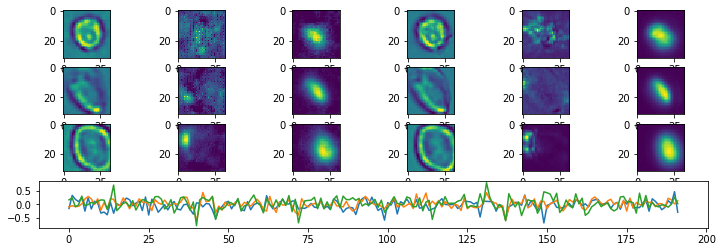

Epoch:  19 Iteration:  0 Loss:  3.90504 0.276759 0.000393748


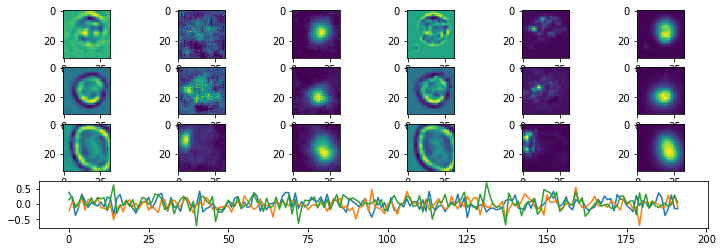

Epoch:  20 Iteration:  0 Loss:  3.86256 0.276506 0.000187382


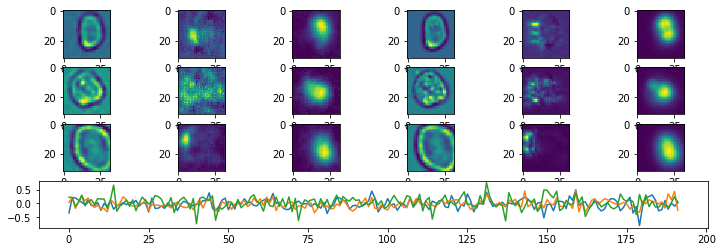

Epoch:  21 Iteration:  0 Loss:  3.71749 0.275795 0.000850782


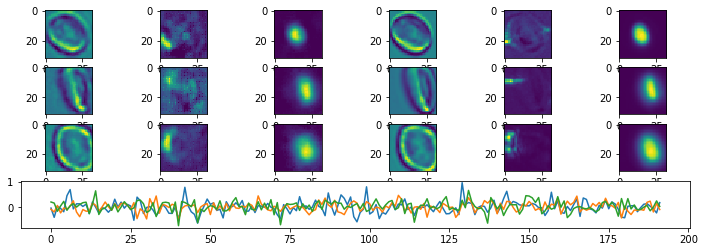

Epoch:  22 Iteration:  0 Loss:  3.58284 0.275432 0.000395432


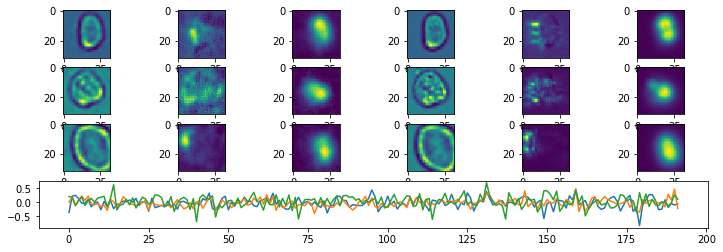

Epoch:  23 Iteration:  0 Loss:  3.5194 0.274957 0.000723824


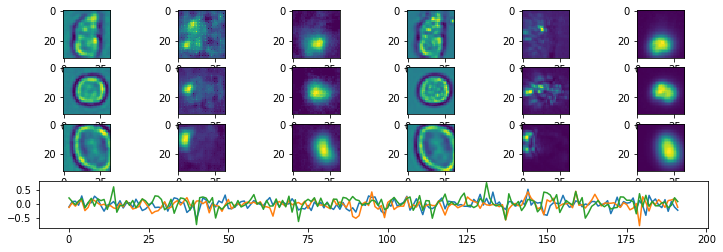

Epoch:  24 Iteration:  0 Loss:  3.39533 0.274816 0.000388309


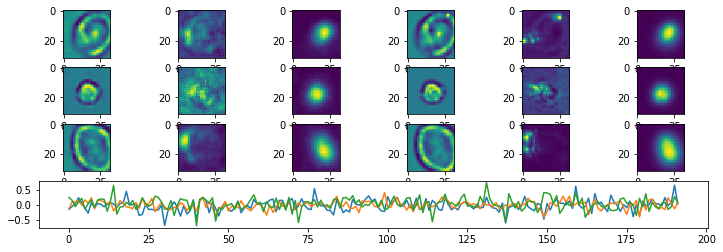

Epoch:  25 Iteration:  0 Loss:  3.34518 0.275168 0.00144269


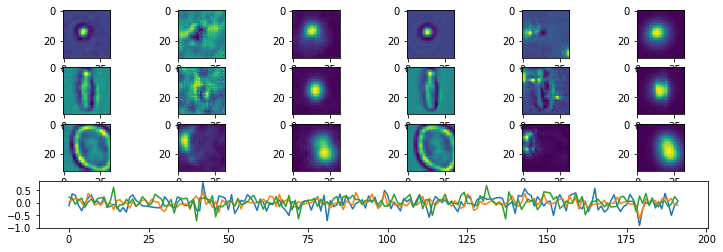

Epoch:  26 Iteration:  0 Loss:  3.28194 0.274545 0.000114411


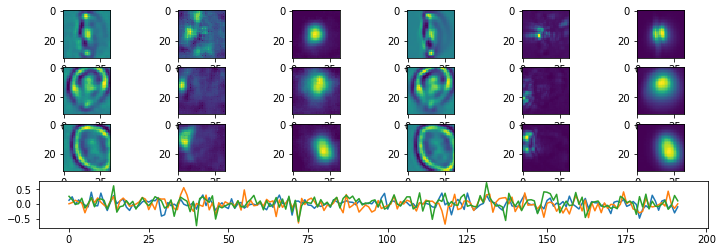

Epoch:  27 Iteration:  0 Loss:  3.21559 0.274345 0.00112224


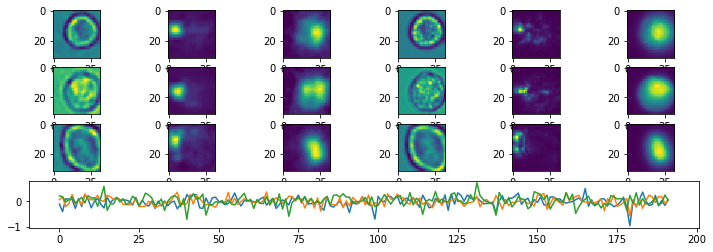

Epoch:  28 Iteration:  0 Loss:  3.09994 0.273765 0.0007983


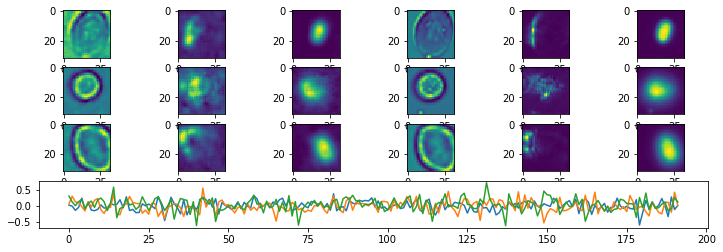

Epoch:  29 Iteration:  0 Loss:  3.05286 0.2739 5.57154e-05


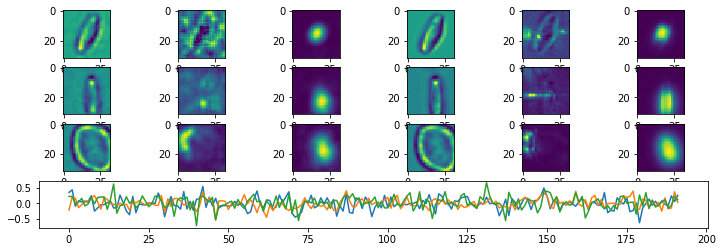

Epoch:  30 Iteration:  0 Loss:  3.02783 0.273627 0.000124872


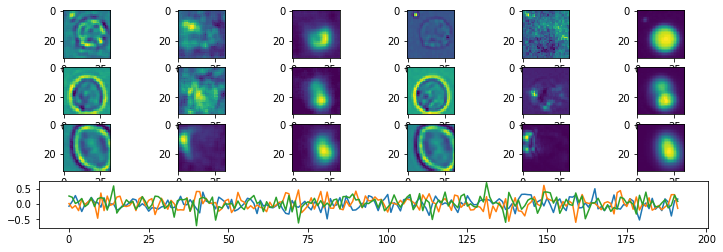

Epoch:  31 Iteration:  0 Loss:  2.9818 0.273511 0.000478804


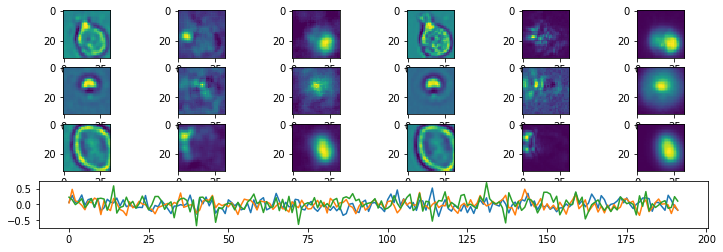

Epoch:  32 Iteration:  0 Loss:  2.92886 0.273574 0.000464097


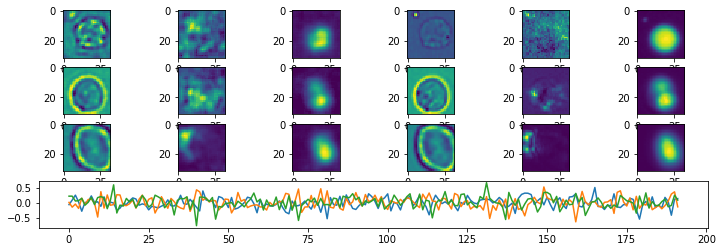

Epoch:  33 Iteration:  0 Loss:  2.87667 0.273227 0.00112969


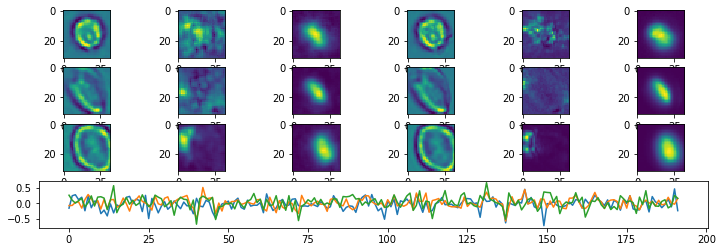

Epoch:  34 Iteration:  0 Loss:  2.78576 0.273151 0.00108767


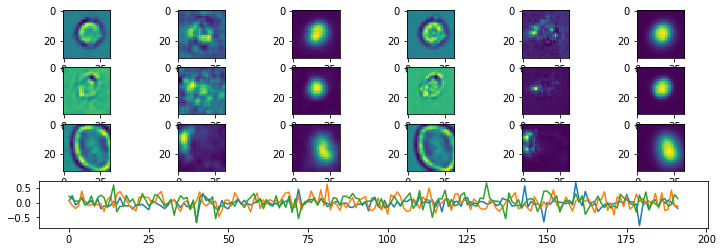

Epoch:  35 Iteration:  0 Loss:  2.74491 0.272968 0.0011594


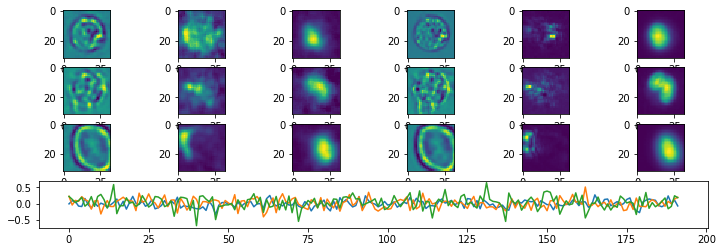

Epoch:  36 Iteration:  0 Loss:  2.70818 0.273264 0.000234872


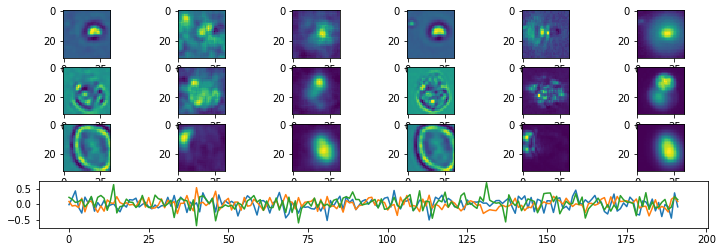

Epoch:  37 Iteration:  0 Loss:  2.80014 0.273185 0.000826925


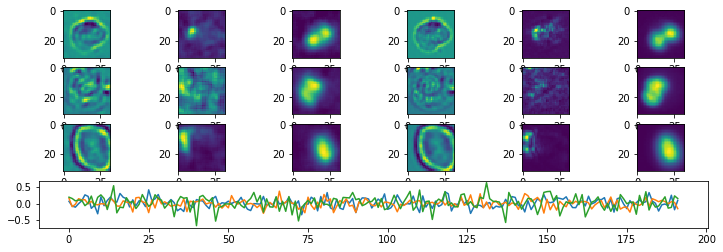

Epoch:  38 Iteration:  0 Loss:  2.62566 0.272909 0.000436962


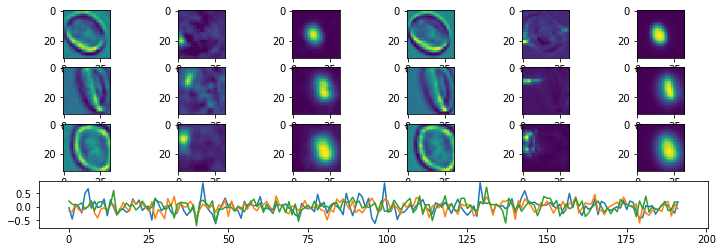

Epoch:  39 Iteration:  0 Loss:  2.59097 0.272715 0.00156084


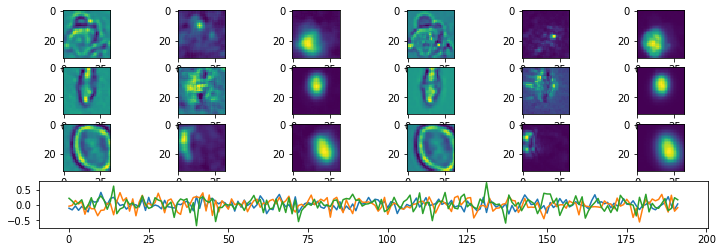

Epoch:  40 Iteration:  0 Loss:  2.57206 0.273271 0.0016885


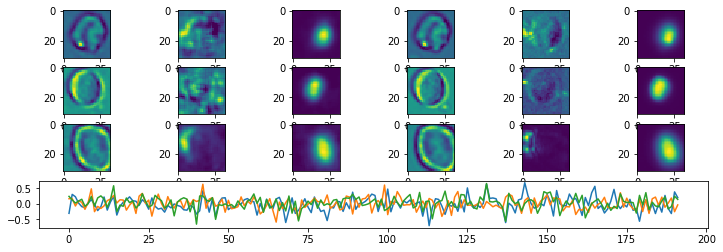

Epoch:  41 Iteration:  0 Loss:  2.54493 0.27281 0.000324085


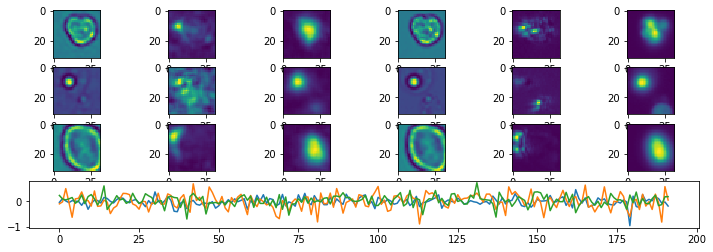

Epoch:  42 Iteration:  0 Loss:  2.56878 0.272649 0.000990719


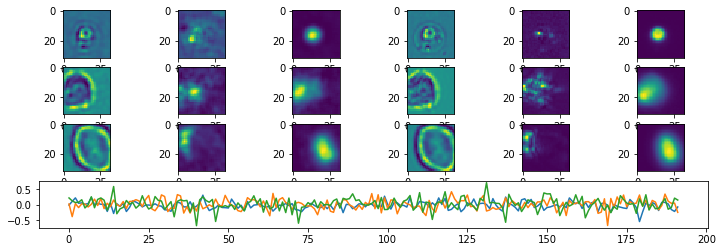

Epoch:  43 Iteration:  0 Loss:  2.50507 0.272753 0.000280812


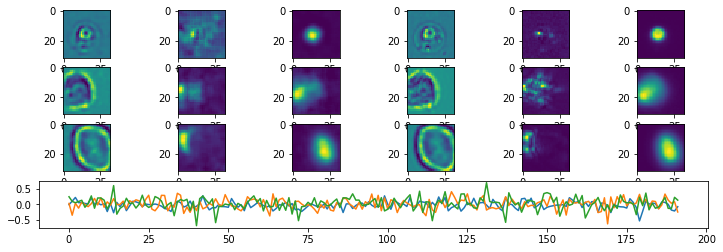

Epoch:  44 Iteration:  0 Loss:  2.4232 0.272693 0.000473231


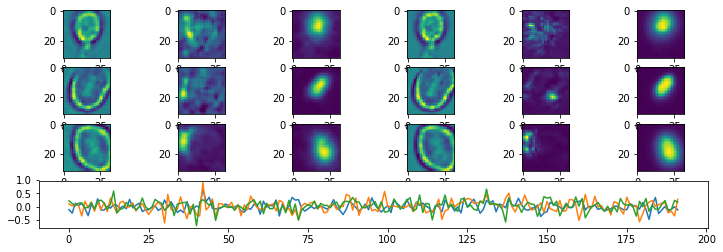

Epoch:  45 Iteration:  0 Loss:  2.45272 0.27255 0.0013109


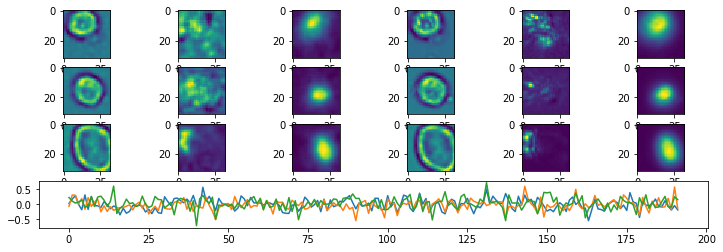

Epoch:  46 Iteration:  0 Loss:  2.40184 0.272698 0.000823259


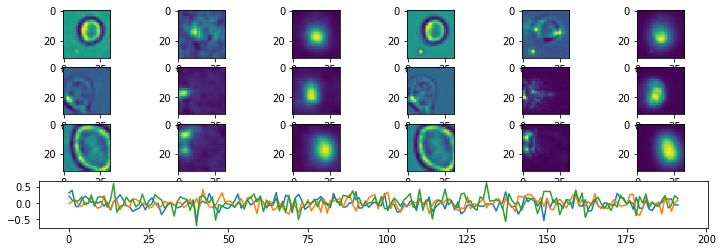

Epoch:  47 Iteration:  0 Loss:  2.35548 0.27242 0.00136745


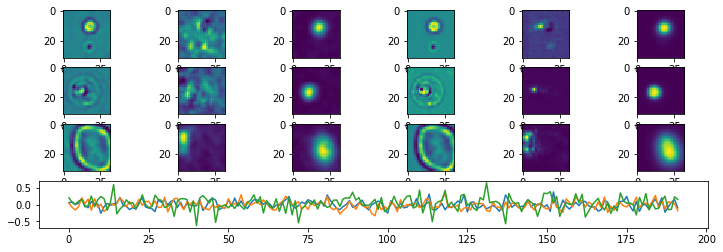

Epoch:  48 Iteration:  0 Loss:  2.33563 0.27255 0.000234455


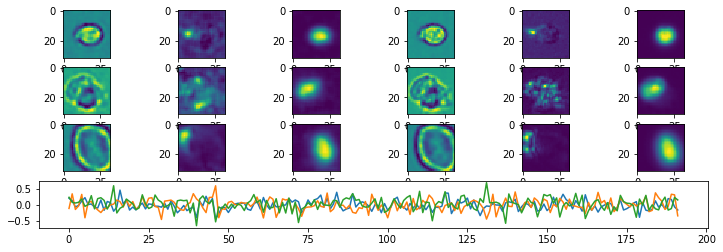

Epoch:  49 Iteration:  0 Loss:  2.42472 0.272643 0.00137103


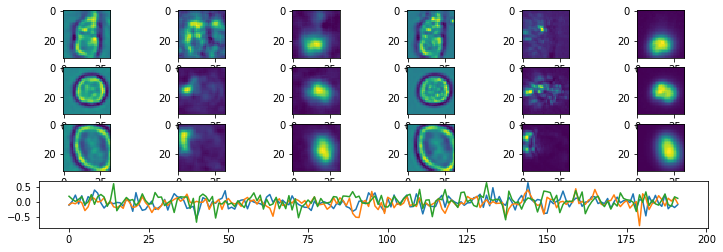

Epoch:  50 Iteration:  0 Loss:  2.31637 0.272607 0.000819728


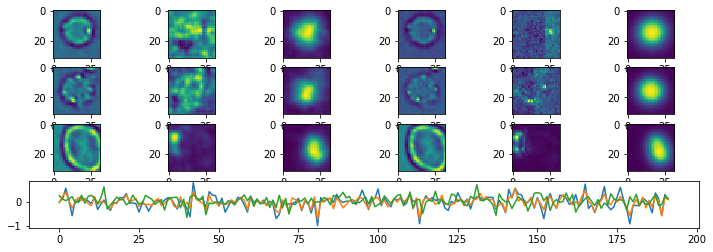

Epoch:  51 Iteration:  0 Loss:  2.32859 0.272297 0.00111313


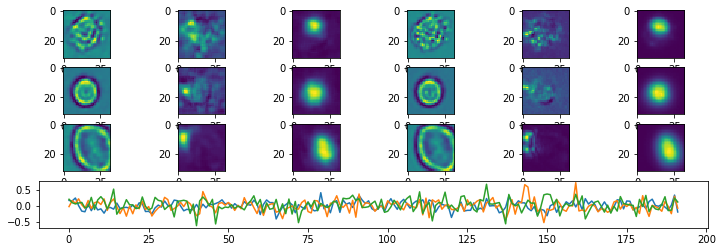

Epoch:  52 Iteration:  0 Loss:  2.26574 0.272437 0.000239328


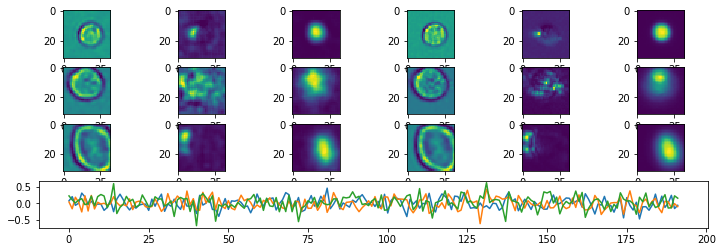

Epoch:  53 Iteration:  0 Loss:  2.28841 0.272092 0.00308174


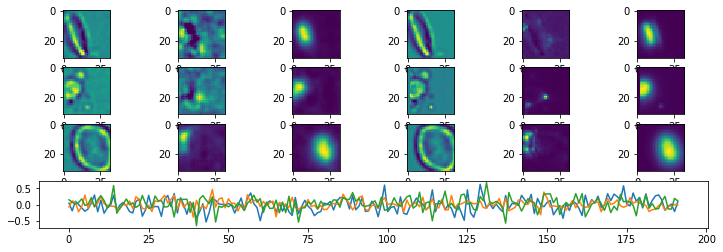

Epoch:  54 Iteration:  0 Loss:  2.26337 0.272385 0.000310436


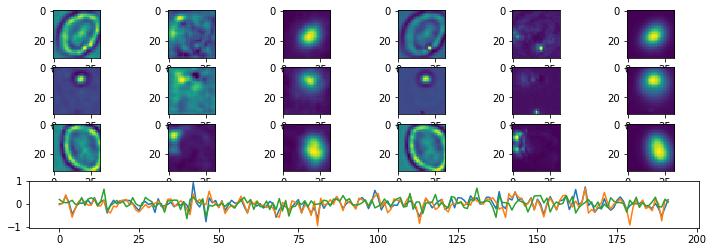

Epoch:  55 Iteration:  0 Loss:  2.246 0.272179 0.00171041


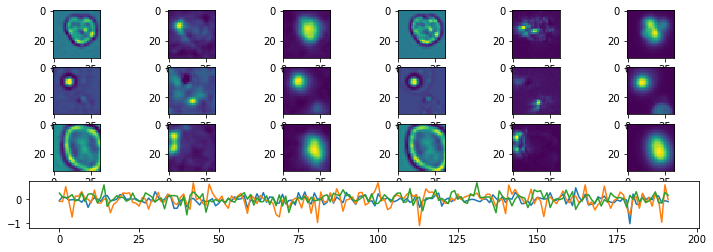

Epoch:  56 Iteration:  0 Loss:  2.21231 0.272109 0.000765502


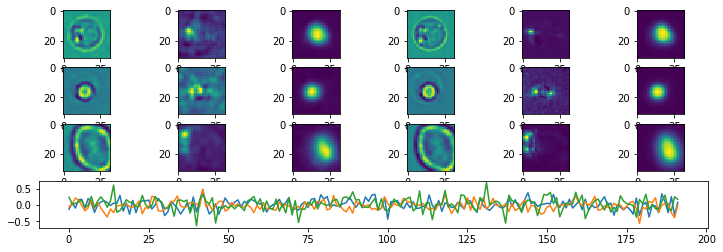

Epoch:  57 Iteration:  0 Loss:  2.19237 0.27219 0.00152741


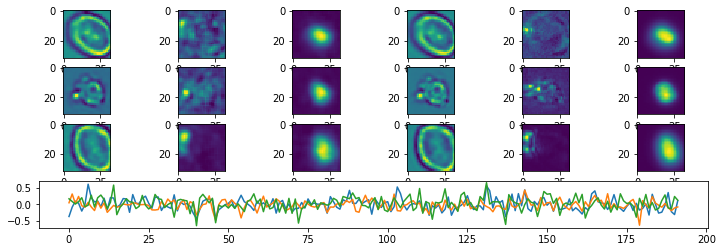

Epoch:  58 Iteration:  0 Loss:  2.16616 0.27208 0.00150275


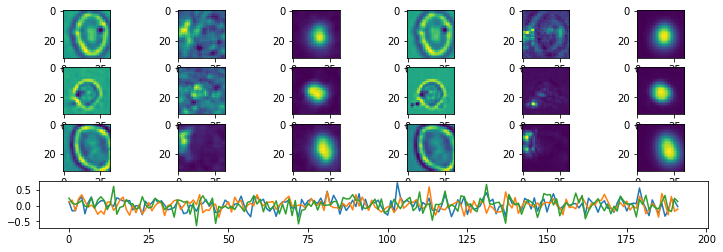

Epoch:  59 Iteration:  0 Loss:  2.17275 0.272247 0.000368714


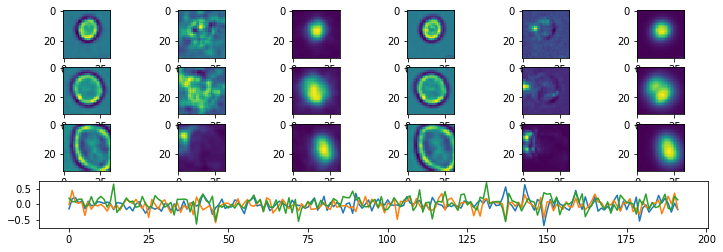

Done


In [5]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 3
p_channels = [0,2,4]
p_nepochs = 60
p_batchsize = 128
p_learning_rate = 0.0002  #.00005
p_restore = False
p_latent_size = 192 #128 + 64
p_droprate = 0.95
p_stdev = .04

enc_sizes = [(64, 3), (128, 3), (256, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-04-16-Chs-0-2-4_32"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 500, cpdir)

In [7]:
x = 4
x

4